# Projet Python 2021 : Prévoir le salaire d'un joueur de NBA

**Projet Semestre 1 de 2A - ENSAE** : Adam Guiffard et Naël Farhan

## Introduction

**Motivation** : Etant tous les deux intéressés par le sport, nous voulions chercher à réaliser un projet en lien avec ce domaine. Nous nous sommes alors tournés vers le basketball et la NBA, une ligue fermée ayant des caractéristiques différentes des autres ligues de sport qui en fait un objet intéressant pour notre projet. Par exemple, toutes les équipes ont un budget total qui ne doit pas dépasser un certain seuil lorsqu'elles doivent rémunérer leurs joueurs (ce qu'on appelle un "cap space"). Ainsi, contrairement au domaine du football, les salaires sont souvent du même ordre de grandeur entre les différentes équipes, ce qui fait que les bons joueurs sont souvent mieux répartis dans les équipes, contrairement au football où les équipes riches accaparent les talents et les plus pauvres se retrouvent avec des joueurs moins bons.

**Déroulé du projet** : Notre projet consistait donc à tenter de prédire le mieux possible le salaire d'un joueur NBA selon plusieurs variables explicatives qui sont couramment utilisées dans les débats pour affirmer qu'un joueur est bon ou non. Nous avons dans un second temps tenté de déterminer si certaines équipes arrivaient suivant nos modèles à payer peu cher de bons joueurs, ou au contraire payer trop cher de mauvais joueurs.
 Tout d'abord, faute d'avoir pu trouver des bases de données contenant les variables qui nous intéressaient, nous avons scrapé les données via une API d'un site spécialisé en sport américain. Nous avons par la suite enrichi les données obtenues en créant ces variables explicatives. Ensuite nous avons réalisé une analyse exploratoire des données en faisant plusieurs remarques sur la propreté des données puis en calculant quelques statistiques descriptives sur différentes variables de nos données. Enfin, nous avons construit différents modèles, de régression et de Machine Learning, afin de prédire au mieux le salaire d'un joueur NBA et de tenter de dire si certaines équipes surpaient ou sous-paient ses joueurs.

**Import des modules et des données**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_21= pd.read_csv('modified data\data21.csv')
df_20= pd.read_csv('modified data\data20.csv')
df_19= pd.read_csv('modified data\data19.csv')
df_21nd= pd.read_csv('unduplicated data\data21nd.csv')
df_20nd= pd.read_csv('unduplicated data\data20nd.csv')
df_19nd= pd.read_csv('unduplicated data\data19nd.csv')

## I - Création et modification des bases de données

### 1 - L'API sportsipy

Lors de nos recherches de base de données, nous avons eu du mal à trouver une base de données qui possédaient à la fois la majorité des statistiques brutes et avancées mesurant la performance d'un joueur lors d'une saison ainsi que son salaire et son équipe, car il fallait prendre des bases de différentes sources qui ne se recoupaient pas au niveau des noms de joueurs (convention différentes) ou même du nombre total de joueur sur une saison. Nous sommes alors tombés sur l'API python *sportsipy* qui est reliée au site *https://www.basketball-reference.com/*, qui possèdent toutes les données possibles et imaginables sur la NBA. Néanmoins, il a fallu du temps pour comprendre comment elle fonctionnait car la documentation était relativement peu commentée et il y avait beaucoup de classes qui avaient l'air de se ressembler mais qui étaient très différentes.
Dans le notebook "web scraping to create data", nous avons fait une fonction qui permet pour une saison donnée de former un DataFrame contenant le salaire, les statistiques données par l'API et l'équipe de chaque joueur. La création d'une base pour une seule saison prend une vingtaine de minutes pour des raisons que nous pensons être dûes à l'API puisque dans un tour de boucle, les calculs prenaient déjà beaucoup de temps (notamment récupérer les joueurs d'une équipe). Nous avons donc récupéré les données uniquement des saisons 2018-19 à 2020-21, qui sont dans le dossier *scraped data*.

### 2 - Création de variables supplémentaires et lignes dupliquées

**Varables supplémentaires** : Les 3 statistiques brutes les plus courantes au basketball sont les points marqués, les rebonds pris et les passes décisives délivrées. Les joueurs n'ayant pas joué le même nombre de matchs, il est plus pertinent de considérer ces variables en moyenne par match. Le notebook "other players indicators" crée ces nouvelles variables et les exportent en fichier csv dans le dossier *modified data*. Notons qu'il existait dans la base les points, rebonds et passes décisives par possession (qui correspond à une séquence où une équipe a la possession de la balle). Ces variables sont également intéressantes, mais il arrive parfois q'un joueur avec beaucoup de points par possession joue peu de temps et que ce nombre vienne à baisser si son temps de jeu venait à augmenter (plus de fatigue, cohabitation avec des stars qui tirent beaucoup...) : ainsi, la statistique par match favorise les joueurs qui jouent beaucoup, et qui sont donc censés être meilleur, du moins selon leur coach.

In [2]:
df_19[df_19.groupby('name')['name'].transform('size') > 1].sort_values(by=['name'])

,and_ones,assist_percentage,assists,assists_per_poss,block_percentage,blocking_fouls,blocks,blocks_per_poss,box_plus_minus,center_percentage,...,usage_percentage,value_over_replacement_player,weight,win_shares,win_shares_per_48_minutes,name,team,points_per_game,reb_per_game,ast_per_game
558,NaN,13.7,128.0,4.6,1.3,NaN,21.0,0.7,-1.2,0,...,19.0,0.3,214,1.5,0.052,Alec Burks,CLE,8.765625,3.671875,2.000000
90,NaN,13.7,128.0,4.6,1.3,NaN,21.0,0.7,-1.2,0,...,19.0,0.3,214,1.5,0.052,Alec Burks,SAC,8.765625,3.671875,2.000000
424,NaN,13.7,128.0,4.6,1.3,NaN,21.0,0.7,-1.2,0,...,19.0,0.3,214,1.5,0.052,Alec Burks,UTA,8.765625,3.671875,2.000000
212,NaN,17.1,24.0,6.3,0.9,NaN,2.0,0.5,-7.1,0,...,16.8,-0.2,213,-0.1,-0.027,Andrew Harrison,NOP,3.176471,1.176471,1.411765
288,NaN,17.1,24.0,6.3,0.9,NaN,2.0,0.5,-7.1,0,...,16.8,-0.2,213,-0.1,-0.027,Andrew Harrison,MEM,3.176471,1.176471,1.411765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,NaN,11.1,160.0,3.7,0.7,NaN,17.0,0.4,-1.8,0,...,17.8,0.1,220,2.7,0.062,Wesley Matthews,IND,12.173913,2.463768,2.318841
160,NaN,11.1,160.0,3.7,0.7,NaN,17.0,0.4,-1.8,0,...,17.8,0.1,220,2.7,0.062,Wesley Matthews,DAL,12.173913,2.463768,2.318841
548,NaN,11.1,160.0,3.7,0.7,NaN,17.0,0.4,-1.8,0,...,17.8,0.1,220,2.7,0.062,Wesley Matthews,NYK,12.173913,2.463768,2.318841
380,NaN,9.1,82.0,3.3,1.4,NaN,21.0,0.8,-2.8,0,...,11.8,-0.2,235,1.5,0.062,Wilson Chandler,PHI,5.980392,4.215686,1.607843


**Lignes dupliquées** : En NBA, l'une des particularités est que les joueurs peuvent être transférés au cours de saison, et donc jouer pour 2 équipes différentes ou plus au cours de la même saison. Sur le tableau ci-dessus, qui représente l'ensemble des lignes où le nom d'un joueur apparaît 2 fois ou plus (joueurs transférés) lors de la saison 2020-21, on remarque que les statistiques de performance sont les mêmes quelque soit l'équipe. Autrement dit, les données ne donnent pas les statistiques d'un joueur uniquement sur les matchs joués avec chaque équipe, mais les statistiques globales sur la saison. Face à ce problème nous avons choisi de procéder ainsi : dans certains cas (notamment les comparaisons par équipe), nous garderons toutes les données ; dans d'autres (modélisation sans prendre en compte les équipes), nous choisissons aléatoirement une équipe à laquelle sera affilié le joueur, puisque nous n'avons pas pu trouver de données donnant tous les joueurs transférés et l'équipe où ils ont le plus joué (ce qui aurait été préférable). Dans le notebook "remove duplicated", nous faisons ceci et exportons ces nouvelles données dans le dossier *unduplicated data*.

## II - Analyse exploratoire et statistiques descriptives

### 1 - Premières remarques

In [3]:
print(len(df_19),len(df_20),len(df_21))

622 592 626


On a environ 600 lignes pour chaque saison dans chacune de nos bases de données scrapées

Il y a 444 joueurs qui apparaissent 1 fois dans la base de 2019
Il y a 80 joueurs qui apparaissent 2 fois dans la base de 2019
Il y a 6 joueurs qui apparaissent 3 fois dans la base de 2019
Il y a 470 joueurs qui apparaissent 1 fois dans la base de 2020
Il y a 58 joueurs qui apparaissent 2 fois dans la base de 2020
Il y a 2 joueurs qui apparaissent 3 fois dans la base de 2020
Il y a 461 joueurs qui apparaissent 1 fois dans la base de 2021
Il y a 72 joueurs qui apparaissent 2 fois dans la base de 2021
Il y a 7 joueurs qui apparaissent 3 fois dans la base de 2021


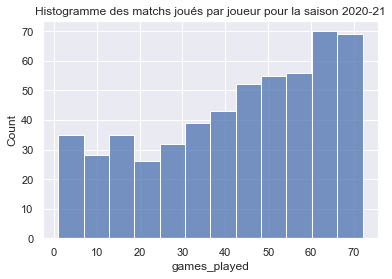

In [4]:
%run "./first remarks.ipynb"

Comme nous pouvons le constater, dans chaque jeu de données il y a un nombre assez important de joueurs qui ont été transféré 1 voire 2 fois au cours de la saison d'après les output du notebook "first remarks" présent ci-dessus.

Par ailleurs, on observe de nombreux joueurs dans la base qui ont joué moins de 20 matchs pendant la saison 2020-21 ; pour les modélisation, on peut considérer que 20 matchs joués ne sont pas suffisants pour rendre les performances d'un joueur significative par rapport à son "vrai niveau" : on omettra donc ces observations dans la partie modélisation.

### 2 - Variable 'salary'

Discutons à présent de la variable que nous allons chercher à prédire, qui est le salaire des joueurs, exprimé en dollars.
Comme nous pouvons le voir ci-dessous, il y a dans chaque jeu entre 50 et 60 salaires de joueurs qui sont inconnus, ce qui semble être problématique. En comparant aux informations du site dont est issu l'API, on remarque que les salaires de ces joueurs sont dits "inférieurs au salaire minimum". Ce sont donc à priori des joueurs moins bons que la moyenne.

In [5]:
print("Il y a "+str(df_19nd['salary'].isnull().sum())+" salaires inconnus dans la base de 2019")
print("Il y a "+str(df_20nd['salary'].isnull().sum())+" salaires inconnus dans la base de 2020")
print("Il y a "+str(df_21nd['salary'].isnull().sum())+" salaires inconnus dans la base de 2021")

Il y a 49 salaires inconnus dans la base de 2019
Il y a 50 salaires inconnus dans la base de 2020
Il y a 59 salaires inconnus dans la base de 2021


De plus, pour ces joueurs dont le salaire est inconnu, la majorité n'a joué que 20 matchs ou moins, comme on peut le voir sur l'histogramme ci-dessous présentant les valeurs de la variable 'games_played' pour ces joueurs au salaire inconnu. Comme beaucoup sont des joueurs qui ont peu joué, ils ne seront pas gardés pendant la partie modélisation. Ainsi l'absence de ces salaires n'aura pas un grand impact dans la partie modélisation.

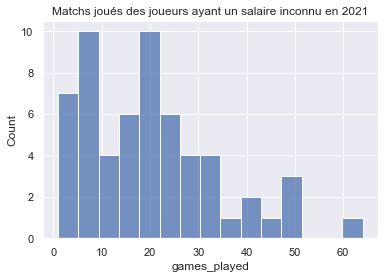

In [6]:
sns.histplot(data = df_21nd[df_21nd['salary'].isnull()], x="games_played", bins=15).set_title('Matchs joués des joueurs ayant un salaire inconnu en 2021')
plt.show()

Regardons à présent la distribution des salaires, présentée ci-dessous pour la saison 2020-21. On note que la distribution est très étalée vers la droite, ce qui signifie qu'il y a quelques grandes valeurs dans les dizaines de millions de dollars qui tirent la moyenne vers le haut. On note qu'une très grande partie des salaires ne dépassent pas les 4 millions, alors que la moyenne est proche de 8 millions.

Nous avons également regardé l'évolution du salaire moyen au fil des saisons de nos jeux de données (2e figure). On remarque qu'il y a une inflation assez importante sur les salaires en NBA, puisque le salaire moyen était d'environ 7 millions de dollars lors de la saison 2018-19 jusqu'à atteindre plus de 7,5 millions en 2020-21 : ceci s'explique par l'augmentation chaque année du montant total (cap space) qu'une équipe peut alouer en salaires à ses joueurs.

Enfin, nous avons voulu regarder le salaire moyen par équipe afin de déterminer s'il y avait des différences ou non. Nous constatons sur la 3e figure ci-dessous que le salaire moyen selon les équipes varie du simple au double : il est de 4 millions pour l'équipe d'Oklahoma City contre 10 millions pour l'équipe de Brooklyn. Ceci s'explique par le fait qu'en 2020-21, Oklahoma City avait un payroll (salaires totaux) de 90 millions de dollars contre 170 millions pour Brooklyn. On reste tout de même dans les mêmes ordres de grandeur, ce qui est prévisible car chaque équipe a un cap qu'elle ne peut pas dépasser lorsqu'elle aloue ses salaires : en pratique la plupart sont souvent très proche de ce cap, et on note que la plupart des équipes ont un salaire moyen compris entre 6 et 8 millions de dollars. Comme les très bons joueurs sont relativement bien dispersés en NBA puisqu'ils sont nombreux à préférer toucher un plus gros salaire dans une équipe qui possède plusieurs stars (qui prennent donc de la place dans le cap space), cette première visualisation peut laisser suggérer que certaines équipes parviennent à payer peu cher de bons joueurs et inversement.

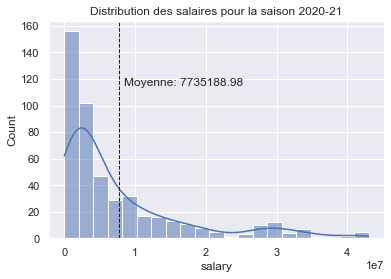

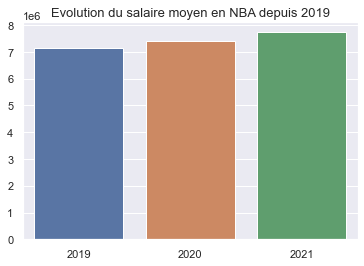

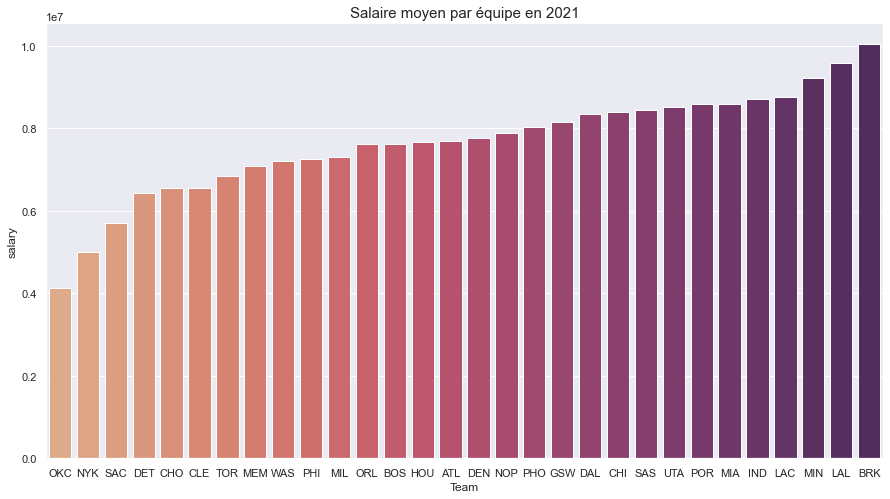

In [7]:
%run "./salary stat desc.ipynb"

### 3 - Variables explicatives retenues

Au basketball, certaines statistiques sont très répandues afin de mesurer l'impact de joueur sur le jeu. Parmi elles, les points marqués, les rebonds pris et les passes décisives délivrées sont les trois statistiques brutes les plus communes au basketball. D'autres statistiques plus avancées existent également, comme le Player Efficiency Rating (PER) qui prend en compte d'autres aspects pour donner un score d'efficacité qui va de 0 à environ 30, ou les Win shares, qui estime le nombre de matchs qu'un joueur fait gagner à son équipe, avec des formules bien compliquées.
Nous allons donc étudier ces variables dans nos données.

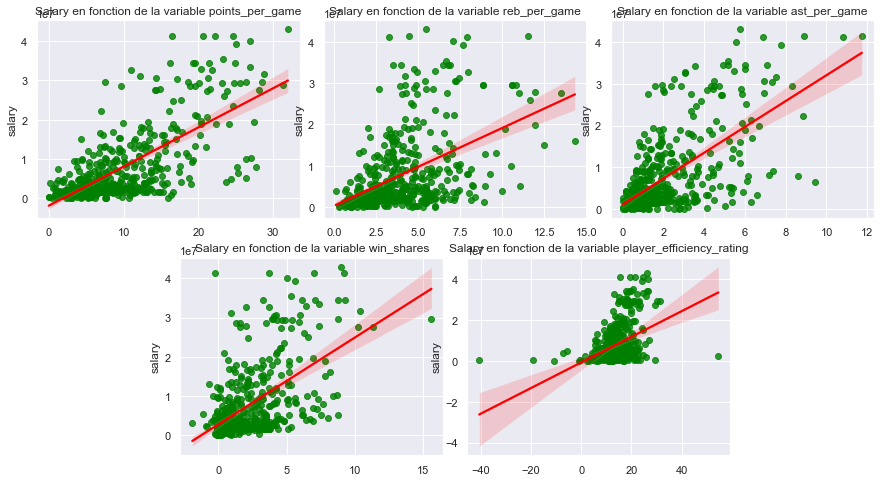

In [8]:
%run "./retained explanatory variables.ipynb"
# j'enlève le nom des variables sur les abscisses car il y a un problème de superposition avec les titres

Pour les 5 variables considérées, on remarque tout d'abord qu'il y a une très grand majorité de points avec des salaires et des variables explicatives faibles (région sud-ouest) : cela peut s'expliquer par la présence d'un grand nombre de joueurs moyens voire médiocres, qui ne sont pas des stars, et qui composent la majorité des équipes. Ensuite, pour toutes les variables, elles semblent être positivement corrélées au salaire comme on pouvait s'y attendre puisque les bons joueurs, qui sont habituellement mieux payés, sont censés avoir de meilleures statistiques que les moins bons joueurs.
Notons également que pour les variables *win_shares* et *player_efficiency_rating*, la corrélation positive semble un peu plus marquée que les autres avec moins de points dans les régions sud-est et nord-ouest, ce qui est compréhensible puisque ces variables sont censée mieux mesurer l'impact d'un joueur, qui est censé être mieux payé s'il est meilleur que les autres.

## III - Modélisation et prévision

La prochaine partie du projet s'est donc consacrée à tenter de prédire les salaires des joueurs NBA avec ces variables explicatives à l'aide de différents modèles. Celle-ci s'est déroulée en 2 étapes : nous avons chercher le modèle le plus adapté pour prédire le salaier sur la saison 2018-19, puis avec ce modèle nous avons prédit les salaires des joueurs de la saison 2020-21 afin de tenter de déterminer quelles équipes ont fait de bonnes ou mauvaises "affaires". Ainsi, nous avons décidé de standardiser la variable 'salary' pour éviter l'effet de l'inflation qui avait été mis en évidence dans les statistiques descriptives. La saison 2019-20 a été intentionnellement mise de côté car elle fût interrompue à cause de la crise du COVID.
Enfin, comme évoqué précédemment, nous ne gardons que les observations des joueurs ayant joué plus de 20 matchs afin que leurs statistiques dans le jeu soient un minimum significatives de leure "vraie" production sur le terrain.

### 1 - Déterminer le meilleur modèle

Les différents modèles que nous avons testés sont répertoriés dans le notebook "analysis and models".
Pour entraîner les modèles, nous avons utilisé la base de données de la saison 2018-19 sans les lignes dupliquées pour éviter les doublons, car dans le cadre de l'entraînement le critère d'appartenance à une équipe n'était pas important.
Nous avons comparé les performances des modèles issus des 3 méthodes suivant : la régression linéaire, les random forest et le SVM (Machine à vecteurs de support) adapté à la régression, en utilisant les variables explicatives suivantes : 'win_shares', 'player_efficiency_rating' ainsi que les points, rebonds et passes décisives par possession dans un premier temps, puis par match dans un second.
Les coefficients R^2 de chaque modèle sont répertoriés dans le notebook : nous les présentons ci-dessous sous la forme d'un tableau.


In [9]:
res = pd.read_csv('model_results.csv')
res = res.rename(columns={'Unnamed: 0': 'type'})
res

,type,svm,RegLin,RandomForest
0,poss,0.278504,0.325447,0.312628
1,game,0.314570,0.346339,0.219361


Nous pouvons déduire plusieurs choses de ces résultats.
La première est que les R^2 sont relativement bas puisqu'ils ne dépassent pas 0,35. Ceci était plutôt prévisible tout d'abord car le modèle s'entraîne sur relativement peu de données (à peine plus de 300) et qu'on a utilisé assez peu de variables explicatives (5). De plus, l'utilisation des variables par match donne dans 2 modèles sur 3 de meilleurs résultats, ce qui confirme partiellement notre intuition sur le fait que les données par match semblaient plus pertinentes à utiliser pour affirmer si un jour est bon, est donc s'il a un salaire important ou pas. Enfin, la régression linéaire apparaît comme le meilleur modèle dans notre cadre face aux algorithmes de ML qui sont relativement mauvais avec peu de variables explicatives et peu de données.

Ainsi, le meilleur modèle permettant de prévoir les salaires des joueurs en 2018-19 est celui de régression linéaire associé aux variables par match (en plus des deux autres variables). Le modèle de régression linéaire ne possède pas de hyper paramètres à faire varier, nous n'avons donc pas pu améliorer ce modèle.

### 2 - Application du modèle suivant les équipes

Le modèle retenu permet de prédire un salaire qui a été préalablement standardisé. Ainsi, à partir des données de la saison 2020-21, on va prédire le salaire des joueurs suivant ce modèle puis "dé-standardiser" ces valeurs suivant la distribution des salaires sur cette saison. Ici, comme l'analyse se fait par équipes, on va garder les lignes dupliquées.

In [10]:
import pickle
model = pickle.load(open('reg_linear_regression.pkl','rb'))

In [11]:
df = df_21[(df_21['games_played']>=20) & (~df_21['salary'].isnull())]
df.reset_index(inplace=True)
mn = df['salary'].mean()
st = df['salary'].std()

In [12]:
df['predicted salary'] = mn + st*model.predict(df[['points_per_game','reb_per_game','ast_per_game','win_shares','player_efficiency_rating']])
df['gap salaries']= df['salary'] - df['predicted salary']
df['error ratio']=df['gap salaries']/df['salary']

<ipython-input-12-151f370deb55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted salary'] = mn + st*model.predict(df[['points_per_game','reb_per_game','ast_per_game','win_shares','player_efficiency_rating']])
<ipython-input-12-151f370deb55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gap salaries']= df['salary'] - df['predicted salary']
<ipython-input-12-151f370deb55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

Comme on peut le voir ci-dessous, d'après notre modèle une grande majorité des joueurs NBA seraient sous-payés par rapport à leur production en match d'environ 140% ; autrement dit, ils devraient gagner un salaire 140% plus élevé. Ce résultat est à prendre avec précaution puisque d'une part, d'une saison à l'autre les statistiques individuelles peuvent augmenter pour tous les joueurs, et comme être bon est relatif aux autres, cela n'impliquerait pas forcément que le salaire de tous doit augmenter et d'autre part notre modèle n'est pas extrêmement précis. Aussi, une telle augmentation ne serait pas réaliste puisque le cap space n'augmente pas d'une telle valeur d'une année à l'autre (inflation plutôt autour de 5% pour le cap space en NBA).

In [13]:
df['error ratio'].describe()

count    488.000000
mean      -1.365496
std        4.918476
min      -73.606190
25%       -1.751790
50%       -0.287230
75%        0.251611
max        1.175975
Name: error ratio, dtype: float64

Enfin, nous calculons pour chaque équipe la somme des écarts entre salaire réel et salaire prédit par le modèle. On remarque que certaines équipes surpaient leurs joueurs tandis que d'autres les sous-paient. Notons que la majorité des équipes (21 sur 30) ont réussi à payer leurs joueurs peu cher par rapport à leur rendement statistique. On retrouve par ailleurs aux extrêmités les équipe d'Oklahoma City et de Brooklyn, qui avaient respectivement les salaires moyens les plus faibles et les plus élevés sur la saison 2020-21. Ici, d'après le modèle, Brooklyn a payé 40 millions de dollars de salaires "en trop" par rapport au rendement de ses joueurs, tandis que Oklahoma City a "économisé" plus de 70 millions de dollars en rémunérant peu des joueurs avec un bon rendement statistique.

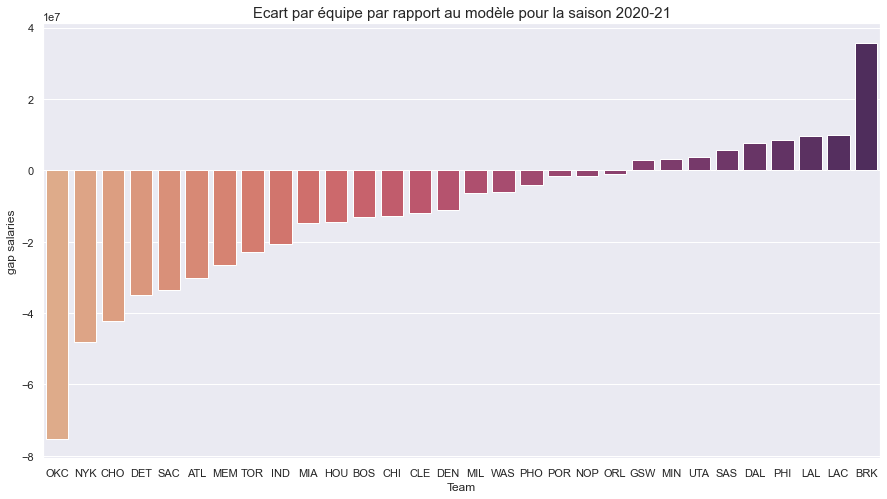

In [14]:
dft = df.groupby('team')['gap salaries'].sum().sort_values().to_frame()
dft['Team'] = dft.index
sns.set(rc={'figure.figsize':(15,8)})
plt.title('Ecart par équipe par rapport au modèle pour la saison 2020-21', fontsize=15)
sns.barplot(data =dft, x='Team', y='gap salaries', palette="flare")

## Conclusion

Tout d'abord, force est de constater que notre problématique était ambitieuse et au vu du faible nombre de données à disposition, il était optimiste de réussir à obtenir des modèles ayant d'excellents résultats en terme de prévision. Néanmoins, avec notre meilleur modèle à disposition, nous avons pu confirmer nos hypothèses émises lors des statistiques descriptives qui suggéraient que certaines équipes parvenaient lors de la saison 2020-21 à faire de bonnes affaires en payant peu cher de bons joueurs et inversement.

De nombreuses limites persistent dans notre approche et suggèrent différentes pistes d'amélioration.
- Nous avons choisi relativement peu de variables explicatives puisque nous avons plutôt pris une approche où nous voulions savoir si notre intuition sur la séléction de variables permettait amenait à une bonne prédiction des salaires. Prendre une grande base de données afin de faire une "feature selection" aurait pu être envisageable, mais scraper les données était coûteux en temps et récupérer les données de plus de saisons aurait pu avoir un effet néfaste sur la prévision avec la présence potentielle d'évolution temporelle de certaines variables, ce qui aurait biaisé les calculs.
- L'absence de données sur les salaires pour une grande partie des joueurs reste un problème que nous n'avons pu résoudre, et ces données auraient peut être changé la donne en ce qui concerne la précision de nos modèles.
- Pour les joueurs transférés en cours de saison, avoir les statistiques du joueur pour chaque équipe aurait également pu permettre d'avoir de meilleurs modèles.
- Nous nous sommes mis dans l'optique où les performances en match d'un joueur déterminait son salaire. Mais on peut imaginer que d'autres critères affectent le salaire d'un joueur : son âge (que nous n'avions pas dans les données), son ancienneté au sein de la NBA mais aussi sa notoriété publique ou encore son professionnalisme.